Created on Tue Mar 19 10:39 2019

Summarize the simulated brightness temperatures based on the 3 assimilation runs, divided by seasons

@author: Clara Burgard

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cmocean
import seaborn as sns

In [2]:
import sys
sys.path.append('./arc3o')
import arc3o_analysis_functions as sana

In [3]:
sns.set_context('paper')

READ IN THE DATA

In [4]:
obs_inputpath = '/work/mh0033/m300411/SatSim/WORK_DATA/observations/'
mod_inputpath = '/work/mh0033/m300411/SatSim/WORK_DATA/simulated_TBs/'
plot_path = '/work/mh0033/m300411/SatSim/PLOTS/'

In [6]:
obs = xr.open_dataset(os.path.abspath(obs_inputpath+'AMSRE_N25km_06V_E_2004-2008_modgrid_hole.nc'))

lon = obs['lon']
lat = obs['lat']

TB_mod_SICCI = xr.open_dataset(os.path.abspath(mod_inputpath+'20191112-1647/mergetime/TBtot_assim_2004-2008_7_dayavg_hole.nc'))
TB_mod_NT = xr.open_dataset(os.path.abspath(mod_inputpath+'20191114-1221/mergetime/TBtot_assim_2004-2008_7_dayavg_hole.nc'))
TB_mod_BT = xr.open_dataset(os.path.abspath(mod_inputpath+'20191114-1216/mergetime/TBtot_assim_2004-2008_7_dayavg_hole.nc'))

TB_mod_SICCI['time'] = TB_mod_SICCI.indexes['time'].round('D')
TB_mod_NT['time'] = TB_mod_NT.indexes['time'].round('D')
TB_mod_BT['time'] = TB_mod_BT.indexes['time'].round('D')

TB_obs = obs['TB']
TBV_mod_SICCI = TB_mod_SICCI['TBV'].sel(time=TB_obs.time)
TBV_mod_NT = TB_mod_NT['TBV'].sel(time=TB_obs.time)
TBV_mod_BT = TB_mod_BT['TBV'].sel(time=TB_obs.time)


PLOT KEY FIGURE FROM THE CRYOSPHERE WEBSITE

In [27]:
def map_npstereo_compare3_onlydiff_seasons(lon,lat,obs,sicci,bt,nt,legend='yes',name='TBV',lat_lim=66,vmin=160,vmax=270,vmindiff=-10,vmaxdiff=10):

    f = plt.figure(figsize=(8, 8))
    #f = plt.figure()
    #f.suptitle(str(time_in.values)[0:16],fontsize=22)
    
    wrap_obs_JFM, wrap_lon = add_cyclic_point(obs.sel(time=sana.is_JFM(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_sicci_JFM, wrap_lon = add_cyclic_point(sicci.sel(time=sana.is_JFM(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_diff1_JFM, wrap_lon = add_cyclic_point((sicci-obs).sel(time=sana.is_JFM(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_bt_JFM, wrap_lon = add_cyclic_point(bt.sel(time=sana.is_JFM(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_diff2_JFM, wrap_lon = add_cyclic_point((bt-obs).sel(time=sana.is_JFM(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_nt_JFM, wrap_lon = add_cyclic_point(nt.sel(time=sana.is_JFM(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_diff3_JFM, wrap_lon = add_cyclic_point((nt-obs).sel(time=sana.is_JFM(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    
    wrap_obs_AMJ, wrap_lon = add_cyclic_point(obs.sel(time=sana.is_AMJ(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_sicci_AMJ, wrap_lon = add_cyclic_point(sicci.sel(time=sana.is_AMJ(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_diff1_AMJ, wrap_lon = add_cyclic_point((sicci-obs).sel(time=sana.is_AMJ(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_bt_AMJ, wrap_lon = add_cyclic_point(bt.sel(time=sana.is_AMJ(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_diff2_AMJ, wrap_lon = add_cyclic_point((bt-obs).sel(time=sana.is_AMJ(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_nt_AMJ, wrap_lon = add_cyclic_point(nt.sel(time=sana.is_AMJ(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_diff3_AMJ, wrap_lon = add_cyclic_point((nt-obs).sel(time=sana.is_AMJ(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    
    wrap_obs_JAS, wrap_lon = add_cyclic_point(obs.sel(time=sana.is_JAS(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_sicci_JAS, wrap_lon = add_cyclic_point(sicci.sel(time=sana.is_JAS(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_diff1_JAS, wrap_lon = add_cyclic_point((sicci-obs).sel(time=sana.is_JAS(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_bt_JAS, wrap_lon = add_cyclic_point(bt.sel(time=sana.is_JAS(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_diff2_JAS, wrap_lon = add_cyclic_point((bt-obs).sel(time=sana.is_JAS(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_nt_JAS, wrap_lon = add_cyclic_point(nt.sel(time=sana.is_JAS(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_diff3_JAS, wrap_lon = add_cyclic_point((nt-obs).sel(time=sana.is_JAS(obs['time.month'])).mean('time').values,coord=lon,axis=1)

    wrap_obs_OND, wrap_lon = add_cyclic_point(obs.sel(time=sana.is_OND(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_sicci_OND, wrap_lon = add_cyclic_point(sicci.sel(time=sana.is_OND(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_diff1_OND, wrap_lon = add_cyclic_point((sicci-obs).sel(time=sana.is_OND(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_bt_OND, wrap_lon = add_cyclic_point(bt.sel(time=sana.is_OND(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_diff2_OND, wrap_lon = add_cyclic_point((bt-obs).sel(time=sana.is_OND(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_nt_OND, wrap_lon = add_cyclic_point(nt.sel(time=sana.is_OND(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_diff3_OND, wrap_lon = add_cyclic_point((nt-obs).sel(time=sana.is_OND(obs['time.month'])).mean('time').values,coord=lon,axis=1)


    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpl.path.Path(verts * radius + center)        
            
    
    ax1 = plt.subplot(4, 4, 1, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax1.coastlines(resolution='110m', linewidth=0.5)
    abso0 = ax1.pcolormesh(wrap_lon,lat,wrap_obs_JFM,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap=cmocean.cm.thermal,rasterized=True)
    ax1.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax1.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax1.set_boundary(circle, transform=ax1.transAxes)

    ax2 = plt.subplot(4, 4, 2, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax2.coastlines(resolution='110m', linewidth=0.5)
    abso = ax2.pcolormesh(wrap_lon,lat,wrap_obs_AMJ,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap=cmocean.cm.thermal,rasterized=True)
    ax2.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax2.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax2.set_boundary(circle, transform=ax2.transAxes)

    ax3 = plt.subplot(4, 4, 3, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax3.coastlines(resolution='110m', linewidth=0.5)
    diff1 = ax3.pcolormesh(wrap_lon,lat,wrap_obs_JAS,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap=cmocean.cm.thermal,rasterized=True)
    ax3.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax3.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax3.set_boundary(circle, transform=ax3.transAxes)

        
    ax4 = plt.subplot(4, 4, 4, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax4.coastlines(resolution='110m', linewidth=0.5)
    abso0 = ax4.pcolormesh(wrap_lon,lat,wrap_obs_OND,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap=cmocean.cm.thermal,rasterized=True)
    ax4.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax4.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax4.set_boundary(circle, transform=ax4.transAxes)
    if legend=='yes':
        cbar = f.colorbar(abso0, ax=ax4, shrink=1.0,orientation='vertical')
        cbar.set_label('TBV [K]',rotation=90)   


    ax9 = plt.subplot(4, 4, 5, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax9.coastlines(resolution='110m', linewidth=0.5)
    diff = ax9.pcolormesh(wrap_lon,lat,wrap_diff1_JFM,transform=ccrs.PlateCarree(),vmax=vmaxdiff,vmin=vmindiff,cmap=mpl.cm.coolwarm,rasterized=True)
    ax9.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax9.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax9.set_boundary(circle, transform=ax9.transAxes)

    ax10 = plt.subplot(4, 4, 6, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax10.coastlines(resolution='110m', linewidth=0.5)
    abso0 = ax10.pcolormesh(wrap_lon,lat,wrap_diff1_AMJ,transform=ccrs.PlateCarree(),vmax=vmaxdiff,vmin=vmindiff,cmap=mpl.cm.coolwarm,rasterized=True)
    ax10.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax10.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax10.set_boundary(circle, transform=ax10.transAxes)

    ax11 = plt.subplot(4, 4, 7, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax11.coastlines(resolution='110m', linewidth=0.5)
    abso = ax11.pcolormesh(wrap_lon,lat,wrap_diff1_JAS,transform=ccrs.PlateCarree(),vmax=vmaxdiff,vmin=vmindiff,cmap=mpl.cm.coolwarm,rasterized=True)
    ax11.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax11.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax11.set_boundary(circle, transform=ax11.transAxes)
 
    ax12 = plt.subplot(4, 4, 8, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax12.coastlines(resolution='110m', linewidth=0.5)
    diff = ax12.pcolormesh(wrap_lon,lat,wrap_diff1_OND,transform=ccrs.PlateCarree(),vmax=vmaxdiff,vmin=vmindiff,cmap=mpl.cm.coolwarm,rasterized=True)
    ax12.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax12.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax12.set_boundary(circle, transform=ax12.transAxes)
    if legend=='yes':
        cbar = f.colorbar(diff, ax=ax12, shrink=1.0,orientation='vertical',extend='both')
        cbar.set_label('$\Delta$TBV [K]',rotation=90)    

    ax17= plt.subplot(4, 4, 9, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax17.coastlines(resolution='110m', linewidth=0.5)
    diff = ax17.pcolormesh(wrap_lon,lat,wrap_diff2_JFM,transform=ccrs.PlateCarree(),vmax=vmaxdiff,vmin=vmindiff,cmap=mpl.cm.coolwarm,rasterized=True)
    ax17.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax17.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax17.set_boundary(circle, transform=ax17.transAxes)

    ax18 = plt.subplot(4, 4, 10, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax18.coastlines(resolution='110m', linewidth=0.5)
    abso0 = ax18.pcolormesh(wrap_lon,lat,wrap_diff2_AMJ,transform=ccrs.PlateCarree(),vmax=vmaxdiff,vmin=vmindiff,cmap=mpl.cm.coolwarm,rasterized=True)
    ax18.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax18.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax18.set_boundary(circle, transform=ax18.transAxes)

    ax19 = plt.subplot(4, 4, 11, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax19.coastlines(resolution='110m', linewidth=0.5)
    abso = ax19.pcolormesh(wrap_lon,lat,wrap_diff2_JAS,transform=ccrs.PlateCarree(),vmax=vmaxdiff,vmin=vmindiff,cmap=mpl.cm.coolwarm,rasterized=True)
    ax19.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax19.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax19.set_boundary(circle, transform=ax19.transAxes)
 
    ax20 = plt.subplot(4, 4, 12, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax20.coastlines(resolution='110m', linewidth=0.5)
    diff = ax20.pcolormesh(wrap_lon,lat,wrap_diff2_OND,transform=ccrs.PlateCarree(),vmax=vmaxdiff,vmin=vmindiff,cmap=mpl.cm.coolwarm,rasterized=True)
    ax20.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax20.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax20.set_boundary(circle, transform=ax20.transAxes)
    if legend=='yes':
        cbar = f.colorbar(diff, ax=ax20, shrink=1.0,orientation='vertical',extend='both')
        cbar.set_label('$\Delta$TBV [K]',rotation=90)      

    ax25= plt.subplot(4, 4, 13, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax25.coastlines(resolution='110m', linewidth=0.5)
    diff = ax25.pcolormesh(wrap_lon,lat,wrap_diff3_JFM,transform=ccrs.PlateCarree(),vmax=vmaxdiff,vmin=vmindiff,cmap=mpl.cm.coolwarm,rasterized=True)
    ax25.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax25.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax25.set_boundary(circle, transform=ax25.transAxes)

    ax26 = plt.subplot(4, 4, 14, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax26.coastlines(resolution='110m', linewidth=0.5)
    abso0 = ax26.pcolormesh(wrap_lon,lat,wrap_diff3_AMJ,transform=ccrs.PlateCarree(),vmax=vmaxdiff,vmin=vmindiff,cmap=mpl.cm.coolwarm,rasterized=True)
    ax26.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax26.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax26.set_boundary(circle, transform=ax26.transAxes)

    ax27 = plt.subplot(4, 4, 15, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax27.coastlines(resolution='110m', linewidth=0.5)
    abso = ax27.pcolormesh(wrap_lon,lat,wrap_diff3_JAS,transform=ccrs.PlateCarree(),vmax=vmaxdiff,vmin=vmindiff,cmap=mpl.cm.coolwarm,rasterized=True)
    ax27.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax27.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax27.set_boundary(circle, transform=ax27.transAxes)
 
    ax28 = plt.subplot(4, 4, 16, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax28.coastlines(resolution='110m', linewidth=0.5)
    diff = ax28.pcolormesh(wrap_lon,lat,wrap_diff3_OND,transform=ccrs.PlateCarree(),vmax=vmaxdiff,vmin=vmindiff,cmap=mpl.cm.coolwarm,rasterized=True)
    ax28.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax28.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax28.set_boundary(circle, transform=ax28.transAxes)
    if legend=='yes':
        cbar = f.colorbar(diff, ax=ax28, shrink=1.0,orientation='vertical',extend='both')
        cbar.set_label('$\Delta$TBV [K]',rotation=90)    


    
    f.tight_layout()
    
    return f

/home/mpim/m300411/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/mpim/m300411/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/mpim/m300411/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/mpim/m300411/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/mpim/m300411/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/mpim/m300411/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype

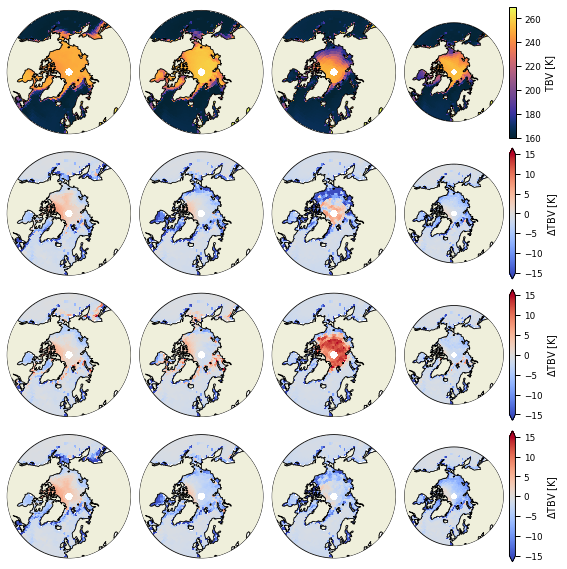

In [28]:
f = map_npstereo_compare3_onlydiff_seasons(lon,lat,TB_obs,TBV_mod_SICCI,TBV_mod_BT,TBV_mod_NT,name='TBV',lat_lim=45,vmin=160,vmax=270,vmindiff=-15,vmaxdiff=15)
f.savefig(plot_path+'Key_figure_withlegend.pdf',bbox_inches='tight',dpi=250,rasterize=True)

In [17]:
f = map_npstereo_compare3_onlydiff_seasons(lon,lat,TB_obs,TBV_mod_SICCI,TBV_mod_BT,TBV_mod_NT,legend='no',name='TBV',lat_lim=45,vmin=160,vmax=270,vmindiff=-15,vmaxdiff=15)
f.savefig(plot_path+'Key_figure_withoutlegend.pdf',bbox_inches='tight',dpi=250,rasterize=True)

/home/mpim/m300411/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/mpim/m300411/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/mpim/m300411/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/mpim/m300411/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/mpim/m300411/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/mpim/m300411/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype

PLOT FIGURE 4

In [14]:
def map_npstereo_compare3_coldseasons(lon,lat,obs,sicci,bt,nt,legend='yes',name='TBV',lat_lim=45,vmin=160,vmax=270,vmindiff=-10,vmaxdiff=10):

    f = plt.figure(figsize=(8*0.75, 14*0.75))
    #f = plt.figure()
    #f.suptitle(str(time_in.values)[0:16],fontsize=22)
    
    wrap_obs_JFM, wrap_lon = add_cyclic_point(obs.sel(time=sana.is_JFM(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_sicci_JFM, wrap_lon = add_cyclic_point(sicci.sel(time=sana.is_JFM(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_diff1_JFM, wrap_lon = add_cyclic_point((sicci-obs).sel(time=sana.is_JFM(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_bt_JFM, wrap_lon = add_cyclic_point(bt.sel(time=sana.is_JFM(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_diff2_JFM, wrap_lon = add_cyclic_point((bt-obs).sel(time=sana.is_JFM(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_nt_JFM, wrap_lon = add_cyclic_point(nt.sel(time=sana.is_JFM(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_diff3_JFM, wrap_lon = add_cyclic_point((nt-obs).sel(time=sana.is_JFM(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    
    wrap_obs_AMJ, wrap_lon = add_cyclic_point(obs.sel(time=sana.is_AMJ(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_sicci_AMJ, wrap_lon = add_cyclic_point(sicci.sel(time=sana.is_AMJ(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_diff1_AMJ, wrap_lon = add_cyclic_point((sicci-obs).sel(time=sana.is_AMJ(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_bt_AMJ, wrap_lon = add_cyclic_point(bt.sel(time=sana.is_AMJ(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_diff2_AMJ, wrap_lon = add_cyclic_point((bt-obs).sel(time=sana.is_AMJ(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_nt_AMJ, wrap_lon = add_cyclic_point(nt.sel(time=sana.is_AMJ(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_diff3_AMJ, wrap_lon = add_cyclic_point((nt-obs).sel(time=sana.is_AMJ(obs['time.month'])).mean('time').values,coord=lon,axis=1)

    wrap_obs_OND, wrap_lon = add_cyclic_point(obs.sel(time=sana.is_OND(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_sicci_OND, wrap_lon = add_cyclic_point(sicci.sel(time=sana.is_OND(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_diff1_OND, wrap_lon = add_cyclic_point((sicci-obs).sel(time=sana.is_OND(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_bt_OND, wrap_lon = add_cyclic_point(bt.sel(time=sana.is_OND(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_diff2_OND, wrap_lon = add_cyclic_point((bt-obs).sel(time=sana.is_OND(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_nt_OND, wrap_lon = add_cyclic_point(nt.sel(time=sana.is_OND(obs['time.month'])).mean('time').values,coord=lon,axis=1)
    wrap_diff3_OND, wrap_lon = add_cyclic_point((nt-obs).sel(time=sana.is_OND(obs['time.month'])).mean('time').values,coord=lon,axis=1)


    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpl.path.Path(verts * radius + center)        
            
    
    ax1 = plt.subplot(7, 3, 1, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax1.coastlines(resolution='110m', linewidth=0.5)
    abso0 = ax1.pcolormesh(wrap_lon,lat,wrap_obs_JFM,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap=cmocean.cm.thermal,rasterized=True)
    ax1.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax1.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax1.set_boundary(circle, transform=ax1.transAxes)

    ax2 = plt.subplot(7, 3, 2, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax2.coastlines(resolution='110m', linewidth=0.5)
    abso = ax2.pcolormesh(wrap_lon,lat,wrap_obs_AMJ,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap=cmocean.cm.thermal,rasterized=True)
    ax2.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax2.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax2.set_boundary(circle, transform=ax2.transAxes)

        
    ax4 = plt.subplot(7, 3, 3, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax4.coastlines(resolution='110m', linewidth=0.5)
    abso0 = ax4.pcolormesh(wrap_lon,lat,wrap_obs_OND,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap=cmocean.cm.thermal,rasterized=True)
    ax4.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax4.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax4.set_boundary(circle, transform=ax4.transAxes)
    if legend=='yes':
        cbar = f.colorbar(abso0, ax=ax4, shrink=1.0,orientation='vertical')
        cbar.set_label('TBV [K]',rotation=90)   


    ax5 = plt.subplot(7, 3, 4, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax5.coastlines(resolution='110m', linewidth=0.5)
    abso = ax5.pcolormesh(wrap_lon,lat,wrap_sicci_JFM,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap=cmocean.cm.thermal,rasterized=True)
    ax5.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax5.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax5.set_boundary(circle, transform=ax5.transAxes)

    ax6 = plt.subplot(7, 3, 5, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax6.coastlines(resolution='110m', linewidth=0.5)
    diff = ax6.pcolormesh(wrap_lon,lat,wrap_sicci_AMJ,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap=cmocean.cm.thermal,rasterized=True)
    ax6.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax6.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax6.set_boundary(circle, transform=ax6.transAxes)

    ax8 = plt.subplot(7, 3, 6, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax8.coastlines(resolution='110m', linewidth=0.5)
    abso = ax8.pcolormesh(wrap_lon,lat,wrap_sicci_OND,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap=cmocean.cm.thermal,rasterized=True)
    ax8.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax8.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax8.set_boundary(circle, transform=ax8.transAxes)
    if legend=='yes':
        cbar = f.colorbar(abso, ax=ax8, shrink=1.0,orientation='vertical')
        cbar.set_label('TBV [K]',rotation=90)   

    ax9 = plt.subplot(7, 3, 7, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax9.coastlines(resolution='110m', linewidth=0.5)
    diff = ax9.pcolormesh(wrap_lon,lat,wrap_diff1_JFM,transform=ccrs.PlateCarree(),vmax=vmaxdiff,vmin=vmindiff,cmap=mpl.cm.coolwarm,rasterized=True)
    ax9.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax9.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax9.set_boundary(circle, transform=ax9.transAxes)

    ax10 = plt.subplot(7, 3, 8, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax10.coastlines(resolution='110m', linewidth=0.5)
    abso0 = ax10.pcolormesh(wrap_lon,lat,wrap_diff1_AMJ,transform=ccrs.PlateCarree(),vmax=vmaxdiff,vmin=vmindiff,cmap=mpl.cm.coolwarm,rasterized=True)
    ax10.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax10.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax10.set_boundary(circle, transform=ax10.transAxes)
 
    ax12 = plt.subplot(7, 3, 9, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax12.coastlines(resolution='110m', linewidth=0.5)
    diff = ax12.pcolormesh(wrap_lon,lat,wrap_diff1_OND,transform=ccrs.PlateCarree(),vmax=vmaxdiff,vmin=vmindiff,cmap=mpl.cm.coolwarm,rasterized=True)
    ax12.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax12.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax12.set_boundary(circle, transform=ax12.transAxes)
    if legend=='yes':
        cbar = f.colorbar(diff, ax=ax12, shrink=1.0,orientation='vertical',extend='both')
        cbar.set_label('$\Delta$TBV [K]',rotation=90)    

    ax13 = plt.subplot(7, 3, 10, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax13.coastlines(resolution='110m', linewidth=0.5)
    abso = ax13.pcolormesh(wrap_lon,lat,wrap_bt_JFM,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap=cmocean.cm.thermal,rasterized=True)
    ax13.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax13.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax13.set_boundary(circle, transform=ax13.transAxes)

    ax14 = plt.subplot(7, 3, 11, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax14.coastlines(resolution='110m', linewidth=0.5)
    diff = ax14.pcolormesh(wrap_lon,lat,wrap_bt_AMJ,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap=cmocean.cm.thermal,rasterized=True)
    ax14.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax14.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax14.set_boundary(circle, transform=ax14.transAxes)

    ax16 = plt.subplot(7, 3, 12, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax16.coastlines(resolution='110m', linewidth=0.5)
    abso = ax16.pcolormesh(wrap_lon,lat,wrap_bt_OND,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap=cmocean.cm.thermal,rasterized=True)
    ax16.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax16.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax16.set_boundary(circle, transform=ax16.transAxes)
    if legend=='yes':
        cbar = f.colorbar(abso, ax=ax16, shrink=1.0,orientation='vertical')
        cbar.set_label('TBV [K]',rotation=90)   

    ax17= plt.subplot(7, 3, 13, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax17.coastlines(resolution='110m', linewidth=0.5)
    diff = ax17.pcolormesh(wrap_lon,lat,wrap_diff2_JFM,transform=ccrs.PlateCarree(),vmax=vmaxdiff,vmin=vmindiff,cmap=mpl.cm.coolwarm,rasterized=True)
    ax17.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax17.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax17.set_boundary(circle, transform=ax17.transAxes)

    ax18 = plt.subplot(7, 3, 14, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax18.coastlines(resolution='110m', linewidth=0.5)
    abso0 = ax18.pcolormesh(wrap_lon,lat,wrap_diff2_AMJ,transform=ccrs.PlateCarree(),vmax=vmaxdiff,vmin=vmindiff,cmap=mpl.cm.coolwarm,rasterized=True)
    ax18.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax18.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax18.set_boundary(circle, transform=ax18.transAxes)

    ax20 = plt.subplot(7, 3, 15, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax20.coastlines(resolution='110m', linewidth=0.5)
    diff = ax20.pcolormesh(wrap_lon,lat,wrap_diff2_OND,transform=ccrs.PlateCarree(),vmax=vmaxdiff,vmin=vmindiff,cmap=mpl.cm.coolwarm,rasterized=True)
    ax20.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax20.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax20.set_boundary(circle, transform=ax20.transAxes)
    if legend=='yes':
        cbar = f.colorbar(diff, ax=ax20, shrink=1.0,orientation='vertical',extend='both')
        cbar.set_label('$\Delta$TBV [K]',rotation=90)    

    ax21 = plt.subplot(7, 3, 16, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax21.coastlines(resolution='110m', linewidth=0.5)
    abso = ax21.pcolormesh(wrap_lon,lat,wrap_nt_JFM,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap=cmocean.cm.thermal,rasterized=True)
    ax21.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax21.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax21.set_boundary(circle, transform=ax21.transAxes)

    ax22 = plt.subplot(7, 3, 17, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax22.coastlines(resolution='110m', linewidth=0.5)
    diff = ax22.pcolormesh(wrap_lon,lat,wrap_nt_AMJ,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap=cmocean.cm.thermal,rasterized=True)
    ax22.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax22.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax22.set_boundary(circle, transform=ax22.transAxes)

    ax24 = plt.subplot(7, 3, 18, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax24.coastlines(resolution='110m', linewidth=0.5)
    abso = ax24.pcolormesh(wrap_lon,lat,wrap_nt_OND,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap=cmocean.cm.thermal,rasterized=True)
    ax24.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax24.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax24.set_boundary(circle, transform=ax24.transAxes)
    if legend=='yes':
        cbar = f.colorbar(abso, ax=ax24, shrink=1.0,orientation='vertical')
        cbar.set_label('TBV [K]',rotation=90)   

    ax25= plt.subplot(7, 3, 19, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax25.coastlines(resolution='110m', linewidth=0.5)
    diff = ax25.pcolormesh(wrap_lon,lat,wrap_diff3_JFM,transform=ccrs.PlateCarree(),vmax=vmaxdiff,vmin=vmindiff,cmap=mpl.cm.coolwarm,rasterized=True)
    ax25.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax25.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax25.set_boundary(circle, transform=ax25.transAxes)

    ax26 = plt.subplot(7, 3, 20, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax26.coastlines(resolution='110m', linewidth=0.5)
    abso0 = ax26.pcolormesh(wrap_lon,lat,wrap_diff3_AMJ,transform=ccrs.PlateCarree(),vmax=vmaxdiff,vmin=vmindiff,cmap=mpl.cm.coolwarm,rasterized=True)
    ax26.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax26.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax26.set_boundary(circle, transform=ax26.transAxes)
 
    ax28 = plt.subplot(7, 3, 21, projection=ccrs.NorthPolarStereo(central_longitude=0))
    ax28.coastlines(resolution='110m', linewidth=0.5)
    diff = ax28.pcolormesh(wrap_lon,lat,wrap_diff3_OND,transform=ccrs.PlateCarree(),vmax=vmaxdiff,vmin=vmindiff,cmap=mpl.cm.coolwarm,rasterized=True)
    ax28.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
    ax28.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
    ax28.set_boundary(circle, transform=ax28.transAxes)
    if legend=='yes':
        cbar = f.colorbar(diff, ax=ax28, shrink=1.0,orientation='vertical',extend='both')
        cbar.set_label('$\Delta$TBV [K]',rotation=90)    


    
    f.tight_layout()
    
    return f

In [15]:
f = map_npstereo_compare3_coldseasons(lon,lat,TB_obs,TBV_mod_SICCI,TBV_mod_BT,TBV_mod_NT,name='TBV',lat_lim=45,vmin=160,vmax=270,vmindiff=-15,vmaxdiff=15)
f.savefig(plot_path+'Figure4_withlegend.pdf',bbox_inches='tight',dpi=250)

/home/mpim/m300411/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/mpim/m300411/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/mpim/m300411/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/mpim/m300411/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/mpim/m300411/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/mpim/m300411/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype

In [11]:
f = map_npstereo_compare3_coldseasons(lon,lat,TB_obs,TBV_mod_SICCI,TBV_mod_BT,TBV_mod_NT,legend='no',name='TBV',lat_lim=45,vmin=160,vmax=270,vmindiff=-20,vmaxdiff=20)
f.savefig(plot_path+'Figure4_withoutlegend.pdf',bbox_inches='tight',dpi=250)

/home/mpim/m300411/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/mpim/m300411/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/mpim/m300411/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/mpim/m300411/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/mpim/m300411/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/mpim/m300411/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype